In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
weather = pd.read_csv("F:/ipba/REGRESSION/Summary of Weather.csv")

C:\Users\dell pc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
weather.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [7]:
import seaborn as sns

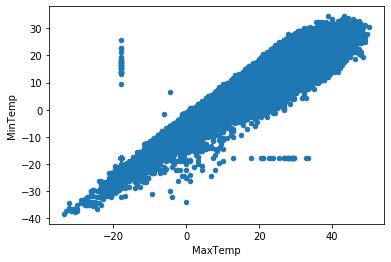

In [9]:
weather.plot(kind = 'scatter',x='MaxTemp',y='MinTemp')

In [11]:
weather['MinTemp'].corr(weather['MaxTemp'])

0.8783839059497572

In [41]:
X = weather.loc[:,['MinTemp','STA','MeanTemp']]

In [34]:
X.shape

(119040,)

In [24]:
Y = weather['MaxTemp']

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 22)

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(95232,)
(23808,)
(95232,)
(23808,)


In [46]:
pred = lr.predict(X_test)

In [47]:
print(Y_test.head(),pred[0:5])

96720    31.111111
35057    28.333333
52775    26.111111
16658   -17.777778
70746    30.000000
Name: MaxTemp, dtype: float64 [ 31.23231071  28.6538227   26.80279011 -16.94132906  29.43674748]


In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
mean_squared_error(Y_test,pred)

1.2544334537657078

In [50]:
import statsmodels.api as sb
X_cons = sb.add_constant(X)
lr = sb.OLS(Y,X_cons).fit()
lr.summary()

C:\Users\dell pc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MaxTemp   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.046e+06
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:23:59   Log-Likelihood:            -1.6753e+05
No. Observations:              119040   AIC:                         3.351e+05
Df Residuals:                  119036   BIC:                         3.351e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7294      0.010     71.173      0.000       0.709       0.749
MinTemp       -0.8790      0.001   -665.300      0.000      -0.882      -0.876
STA          1.32e-06   1.37e-07      9.605      0.000    1.05e-06    1.59e-06
MeanTemp       1.8702      0.001   1407.437      0.000       1.868       1.873
==============================================================================
Omnibus:                   316060.181   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      15105744846.966
Skew:                          31.667   Prob(JB):                         0.00
Kurtosis:                    1746.990   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

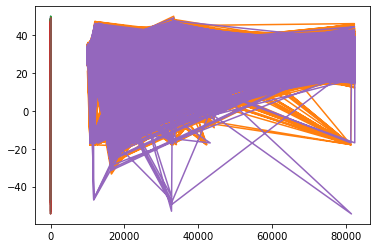

In [57]:
#shows the accuracy of our prediction orange is training dataset and purple is predicted dataset 
plt.plot(X_train,Y_train)
plt.plot(X_test,pred)
plt.show()